In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from glob import glob
import pandas as pd
import numpy as np
from PIL import Image
import keras
from numpy.random import seed
seed(7)


In [2]:
!pip install disarray

In [3]:
base_skin_dir = os.path.join('../input/isicdata')

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, 'ISIC2016_Training_Data_Patch/*.png'))}

# This dictionary is useful for displaying more human-friendly labels later on

lesion_type_dict = {
    'benign': 'Non-melanoma',
    'malignant': 'Melanoma'
}

In [4]:
skin_df = pd.read_csv(os.path.join(base_skin_dir, 'ISIC2016_Training_GroundTruth_patch.csv'))


# Creating New Columns for better readability
skin_df['path'] = skin_df['image_id'].map(imageid_path_dict.get)
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get) 
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [5]:
# Now lets see the sample of tile_df to look on newly made columns
skin_df.head()

,image_id,dx,path,cell_type,cell_type_idx
0,ISIC_0000425_0,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1
1,ISIC_0000425_1,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1
2,ISIC_0000425_2,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1
3,ISIC_0000425_3,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1
4,ISIC_0000425_4,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1


In [6]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))

In [7]:
skin_df.head()

,image_id,dx,path,cell_type,cell_type_idx,image
0,ISIC_0000425_0,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1,"[[[199, 180, 165], [204, 182, 167], [202, 184,..."
1,ISIC_0000425_1,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1,"[[[215, 186, 170], [220, 188, 173], [216, 188,..."
2,ISIC_0000425_2,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1,"[[[209, 189, 186], [213, 189, 184], [210, 187,..."
3,ISIC_0000425_3,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1,"[[[216, 179, 160], [214, 178, 156], [212, 176,..."
4,ISIC_0000425_4,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1,"[[[223, 152, 121], [225, 154, 124], [224, 153,..."


In [8]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, 'ISIC2016_Training_Data_Crop/*.jpg'))}

skin_df_train_orignal = pd.read_csv(os.path.join(base_skin_dir, 'ISIC2016_Training_GroundTruth.csv'))

# Creating New Columns for better readability
skin_df_train_orignal['path'] = skin_df_train_orignal['image_id'].map(imageid_path_dict.get)
skin_df_train_orignal['cell_type'] = skin_df_train_orignal['dx'].map(lesion_type_dict.get) 
skin_df_train_orignal['cell_type_idx'] = pd.Categorical(skin_df_train_orignal['cell_type']).codes


skin_df_train_orignal['image'] = skin_df_train_orignal['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))
skin_df_train_orignal.head()

,image_id,dx,path,cell_type,cell_type_idx,image
0,ISIC_0000000,benign,../input/isicdata/ISIC2016_Training_Data_Crop/...,Non-melanoma,1,"[[[165, 207, 245], [166, 208, 246], [167, 207,..."
1,ISIC_0000001,benign,../input/isicdata/ISIC2016_Training_Data_Crop/...,Non-melanoma,1,"[[[159, 153, 155], [158, 152, 154], [157, 151,..."
2,ISIC_0000002,malignant,../input/isicdata/ISIC2016_Training_Data_Crop/...,Melanoma,0,"[[[137, 169, 236], [131, 162, 228], [136, 165,..."
3,ISIC_0000004,malignant,../input/isicdata/ISIC2016_Training_Data_Crop/...,Melanoma,0,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
4,ISIC_0000006,benign,../input/isicdata/ISIC2016_Training_Data_Crop/...,Non-melanoma,1,"[[[142, 161, 185], [142, 159, 183], [141, 157,..."


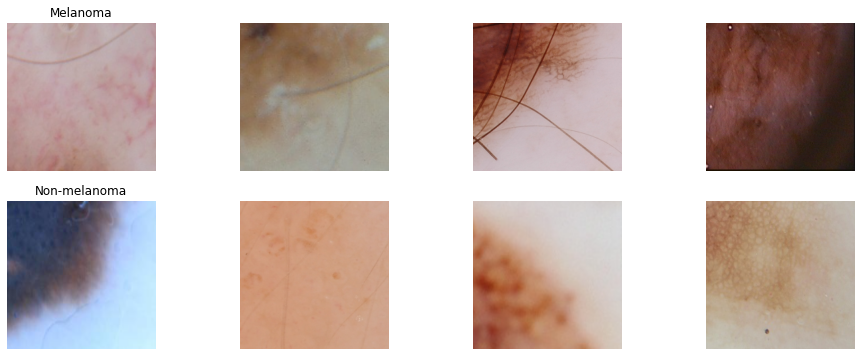

In [9]:
n_samples = 4
fig, m_axs = plt.subplots(2, n_samples, figsize = (4*n_samples, 3*2))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
#fig.savefig('category_samples.png', dpi=300)

In [10]:
# Checking the image size distribution
skin_df['image'].map(lambda x: x.shape).value_counts()

(224, 224, 3)    8100
Name: image, dtype: int64

In [11]:
#Split Train Dataframe

skin_df1 = skin_df[0::9]
skin_df2 = skin_df[1::9]
skin_df3 = skin_df[2::9]
skin_df4 = skin_df[3::9]
skin_df5 = skin_df[4::9]
skin_df6 = skin_df[5::9]
skin_df7 = skin_df[6::9]
skin_df8 = skin_df[7::9]
skin_df9 = skin_df[8::9]

#skin_df8 = skin_df[0::9]

In [12]:
skin_df2.head()

,image_id,dx,path,cell_type,cell_type_idx,image
1,ISIC_0000425_1,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1,"[[[215, 186, 170], [220, 188, 173], [216, 188,..."
10,ISIC_0009975_1,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1,"[[[175, 162, 154], [175, 162, 154], [174, 159,..."
19,ISIC_0000000_1,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1,"[[[166, 209, 251], [165, 208, 250], [166, 208,..."
28,ISIC_0000001_1,benign,../input/isicdata/ISIC2016_Training_Data_Patch...,Non-melanoma,1,"[[[153, 142, 140], [152, 141, 139], [152, 141,..."
37,ISIC_0000002_1,malignant,../input/isicdata/ISIC2016_Training_Data_Patch...,Melanoma,0,"[[[145, 157, 195], [146, 159, 196], [148, 161,..."


In [13]:
trainfeatures1=skin_df1.drop(columns=['cell_type_idx'],axis=1)
trainfeatures2=skin_df2.drop(columns=['cell_type_idx'],axis=1)
trainfeatures3=skin_df3.drop(columns=['cell_type_idx'],axis=1)
trainfeatures4=skin_df4.drop(columns=['cell_type_idx'],axis=1)
trainfeatures5=skin_df5.drop(columns=['cell_type_idx'],axis=1)
trainfeatures6=skin_df6.drop(columns=['cell_type_idx'],axis=1)
trainfeatures7=skin_df7.drop(columns=['cell_type_idx'],axis=1)
trainfeatures8=skin_df8.drop(columns=['cell_type_idx'],axis=1)
trainfeatures9=skin_df9.drop(columns=['cell_type_idx'],axis=1)

train_target=skin_df1['cell_type_idx']

trainfeatures1.shape


(900, 5)

In [14]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, 'ISIC2016_Test_Data_Patch/*.png'))}

skin_df_test = pd.read_csv(os.path.join(base_skin_dir, 'ISIC2016_Test_GroundTruth_patch.csv'))

# Creating New Columns for better readability
skin_df_test['path'] = skin_df_test['image_id'].map(imageid_path_dict.get)
skin_df_test['cell_type'] = skin_df_test['dx'].map(lesion_type_dict.get) 
skin_df_test['cell_type_idx'] = pd.Categorical(skin_df_test['cell_type']).codes


skin_df_test['image'] = skin_df_test['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))
skin_df_test.head()


,image_id,dx,path,cell_type,cell_type_idx,image
0,ISIC_0000003_0,benign,../input/isicdata/ISIC2016_Test_Data_Patch/ISI...,Non-melanoma,1,"[[[217, 217, 219], [217, 217, 219], [217, 217,..."
1,ISIC_0000003_1,benign,../input/isicdata/ISIC2016_Test_Data_Patch/ISI...,Non-melanoma,1,"[[[211, 202, 207], [211, 202, 207], [211, 202,..."
2,ISIC_0000003_2,benign,../input/isicdata/ISIC2016_Test_Data_Patch/ISI...,Non-melanoma,1,"[[[215, 209, 211], [215, 209, 211], [215, 209,..."
3,ISIC_0000003_3,benign,../input/isicdata/ISIC2016_Test_Data_Patch/ISI...,Non-melanoma,1,"[[[210, 200, 200], [210, 200, 199], [210, 200,..."
4,ISIC_0000003_4,benign,../input/isicdata/ISIC2016_Test_Data_Patch/ISI...,Non-melanoma,1,"[[[59, 36, 30], [58, 34, 29], [59, 36, 30], [6..."


In [15]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, 'ISIC2016_Test_Data_Crop/*.jpg'))}

skin_df_test_orignal = pd.read_csv(os.path.join(base_skin_dir, 'ISIC2016_Test_GroundTruth.csv'))

# Creating New Columns for better readability
skin_df_test_orignal['path'] = skin_df_test_orignal['image_id'].map(imageid_path_dict.get)
skin_df_test_orignal['cell_type'] = skin_df_test_orignal['dx'].map(lesion_type_dict.get) 
skin_df_test_orignal['cell_type_idx'] = pd.Categorical(skin_df_test_orignal['cell_type']).codes


skin_df_test_orignal['image'] = skin_df_test_orignal['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))
skin_df_test_orignal.head()


,image_id,dx,path,cell_type,cell_type_idx,image
0,ISIC_0000003,benign,../input/isicdata/ISIC2016_Test_Data_Crop/ISIC...,Non-melanoma,1,"[[[217, 217, 219], [217, 217, 219], [217, 217,..."
1,ISIC_0000012,benign,../input/isicdata/ISIC2016_Test_Data_Crop/ISIC...,Non-melanoma,1,"[[[157, 145, 155], [153, 141, 151], [145, 133,..."
2,ISIC_0000013,malignant,../input/isicdata/ISIC2016_Test_Data_Crop/ISIC...,Melanoma,0,"[[[220, 217, 224], [220, 217, 224], [220, 217,..."
3,ISIC_0000014,benign,../input/isicdata/ISIC2016_Test_Data_Crop/ISIC...,Non-melanoma,1,"[[[177, 177, 186], [176, 175, 183], [176, 175,..."
4,ISIC_0000015,benign,../input/isicdata/ISIC2016_Test_Data_Crop/ISIC...,Non-melanoma,1,"[[[186, 174, 195], [186, 176, 198], [186, 177,..."


In [16]:
# Split Test Dataframe
skin_df_test1 = skin_df_test[0::9]
skin_df_test2 = skin_df_test[1::9]
skin_df_test3 = skin_df_test[2::9]
skin_df_test4 = skin_df_test[3::9]
skin_df_test5 = skin_df_test[4::9]
skin_df_test6 = skin_df_test[5::9]
skin_df_test7 = skin_df_test[6::9]
skin_df_test8 = skin_df_test[7::9]
skin_df_test9 = skin_df_test[8::9]


In [17]:
skin_df_test9.head()

,image_id,dx,path,cell_type,cell_type_idx,image
8,ISIC_0000003_8,benign,../input/isicdata/ISIC2016_Test_Data_Patch/ISI...,Non-melanoma,1,"[[[115, 80, 59], [113, 79, 58], [111, 78, 58],..."
17,ISIC_0000012_8,benign,../input/isicdata/ISIC2016_Test_Data_Patch/ISI...,Non-melanoma,1,"[[[102, 51, 40], [103, 51, 40], [104, 52, 40],..."
26,ISIC_0000013_8,malignant,../input/isicdata/ISIC2016_Test_Data_Patch/ISI...,Melanoma,0,"[[[35, 35, 33], [37, 37, 35], [40, 40, 38], [4..."
35,ISIC_0000014_8,benign,../input/isicdata/ISIC2016_Test_Data_Patch/ISI...,Non-melanoma,1,"[[[166, 139, 127], [166, 139, 128], [167, 142,..."
44,ISIC_0000015_8,benign,../input/isicdata/ISIC2016_Test_Data_Patch/ISI...,Non-melanoma,1,"[[[125, 61, 25], [127, 65, 28], [126, 64, 27],..."


In [18]:
testfeatures1=skin_df_test1.drop(columns=['cell_type_idx'],axis=1)
testfeatures2=skin_df_test2.drop(columns=['cell_type_idx'],axis=1)
testfeatures3=skin_df_test3.drop(columns=['cell_type_idx'],axis=1)
testfeatures4=skin_df_test4.drop(columns=['cell_type_idx'],axis=1)
testfeatures5=skin_df_test5.drop(columns=['cell_type_idx'],axis=1)
testfeatures6=skin_df_test6.drop(columns=['cell_type_idx'],axis=1)
testfeatures7=skin_df_test7.drop(columns=['cell_type_idx'],axis=1)
testfeatures8=skin_df_test8.drop(columns=['cell_type_idx'],axis=1)
testfeatures9=skin_df_test9.drop(columns=['cell_type_idx'],axis=1)

test_target=skin_df_test1['cell_type_idx']

testfeatures1.shape

(379, 5)

In [19]:
x_train1 = np.asarray(trainfeatures1['image'].tolist())
x_train2 = np.asarray(trainfeatures2['image'].tolist())
x_train3 = np.asarray(trainfeatures3['image'].tolist())
x_train4 = np.asarray(trainfeatures4['image'].tolist())
x_train5 = np.asarray(trainfeatures5['image'].tolist())
x_train6 = np.asarray(trainfeatures6['image'].tolist())
x_train7 = np.asarray(trainfeatures7['image'].tolist())
x_train8 = np.asarray(trainfeatures8['image'].tolist())
x_train9 = np.asarray(trainfeatures9['image'].tolist())


x_test1 = np.asarray(testfeatures1['image'].tolist())
x_test2 = np.asarray(testfeatures2['image'].tolist())
x_test3 = np.asarray(testfeatures3['image'].tolist())
x_test4 = np.asarray(testfeatures4['image'].tolist())
x_test5 = np.asarray(testfeatures5['image'].tolist())
x_test6 = np.asarray(testfeatures6['image'].tolist())
x_test7 = np.asarray(testfeatures7['image'].tolist())
x_test8 = np.asarray(testfeatures8['image'].tolist())
x_test9 = np.asarray(testfeatures9['image'].tolist())

In [20]:
x_train_orignal = np.asarray(skin_df_train_orignal['image'].tolist())

x_test_orignal = np.asarray(skin_df_test_orignal['image'].tolist())

In [21]:
# x_train1 = x_train1/255.0
# x_test1 = x_test1/255.0

#x_train1_mean = np.mean(x_train1)
#x_train1_std = np.std(x_train1)
#x_test1_mean = np.mean(x_test1)
#x_test1_std = np.std(x_test1)
#x_train1 = (x_train1 - x_train1_mean)/x_train1_std
#x_test1 = (x_test1 - x_test1_mean)/x_test1_std

# calculate per-channel means and standard deviations
# x_train1_mean = x_train1.mean(axis=(0,1,2), dtype='float64')
# x_train1_std = x_train1.std(axis=(0,1,2), dtype='float64')
# x_test1_mean = x_test1.mean(axis=(0,1,2), dtype='float64')
# x_test1_std = x_test1.std(axis=(0,1,2), dtype='float64')
# x_train1 = (x_train1 - x_train1_mean)/x_train1_std
# x_test1 = (x_test1 - x_test1_mean)/x_test1_std

In [22]:
# x_train2 = x_train2/255.0
# x_test2 = x_test2/255.0

#x_train2_mean = np.mean(x_train2)
#x_train2_std = np.std(x_train2)
#x_test2_mean = np.mean(x_test2)
#x_test2_std = np.std(x_test2)
#x_train2 = (x_train2 - x_train2_mean)/x_train2_std
#x_test2 = (x_test2 - x_test2_mean)/x_test2_std

# calculate per-channel means and standard deviations
# x_train2_mean = x_train2.mean(axis=(0,1,2), dtype='float64')
# x_train2_std = x_train2.std(axis=(0,1,2), dtype='float64')
# x_test2_mean = x_test2.mean(axis=(0,1,2), dtype='float64')
# x_test2_std = x_test2.std(axis=(0,1,2), dtype='float64')
# x_train2 = (x_train2 - x_train2_mean)/x_train2_std
# x_test2 = (x_test2 - x_test2_mean)/x_test2_std

In [23]:
# x_train3 = x_train3/255.0
# x_test3 = x_test3/255.0

#x_train3_mean = np.mean(x_train3)
#x_train3_std = np.std(x_train3)
#x_test3_mean = np.mean(x_test3)
#x_test3_std = np.std(x_test3)
#x_train3 = (x_train3 - x_train3_mean)/x_train3_std
#x_test3 = (x_test3 - x_test3_mean)/x_test3_std

# calculate per-channel means and standard deviations
# x_train3_mean = x_train3.mean(axis=(0,1,2), dtype='float64')
# x_train3_std = x_train3.std(axis=(0,1,2), dtype='float64')
# x_test3_mean = x_test3.mean(axis=(0,1,2), dtype='float64')
# x_test3_std = x_test3.std(axis=(0,1,2), dtype='float64')
# x_train3 = (x_train3 - x_train3_mean)/x_train3_std
# x_test3 = (x_test3 - x_test3_mean)/x_test3_std

In [24]:
# x_train4 = x_train4/255.0
# x_test4 = x_test4/255.0

#x_train4_mean = np.mean(x_train4)
#x_train4_std = np.std(x_train4)
#x_test4_mean = np.mean(x_test4)
#x_test4_std = np.std(x_test4)
#x_train4 = (x_train4 - x_train4_mean)/x_train4_std
#x_test4 = (x_test4 - x_test4_mean)/x_test4_std

# calculate per-channel means and standard deviations
# x_train4_mean = x_train4.mean(axis=(0,1,2), dtype='float64')
# x_train4_std = x_train4.std(axis=(0,1,2), dtype='float64')
# x_test4_mean = x_test4.mean(axis=(0,1,2), dtype='float64')
# x_test4_std = x_test4.std(axis=(0,1,2), dtype='float64')
# x_train4 = (x_train4 - x_train4_mean)/x_train4_std
# x_test4 = (x_test4 - x_test4_mean)/x_test4_std

In [25]:
# x_train5 = x_train5/255.0
# x_test5 = x_test5/255.0

#x_train5_mean = np.mean(x_train5)
#x_train5_std = np.std(x_train5)
#x_test5_mean = np.mean(x_test5)
#x_test5_std = np.std(x_test5)
#x_train5 = (x_train5 - x_train5_mean)/x_train5_std
#x_test5 = (x_test5 - x_test5_mean)/x_test5_std

# calculate per-channel means and standard deviations
# x_train5_mean = x_train5.mean(axis=(0,1,2), dtype='float64')
# x_train5_std = x_train5.std(axis=(0,1,2), dtype='float64')
# x_test5_mean = x_test5.mean(axis=(0,1,2), dtype='float64')
# x_test5_std = x_test5.std(axis=(0,1,2), dtype='float64')
# x_train5 = (x_train5 - x_train5_mean)/x_train5_std
# x_test5 = (x_test5 - x_test5_mean)/x_test5_std

In [26]:
# x_train6 = x_train6/255.0
# x_test6 = x_test6/255.0

#x_train6_mean = np.mean(x_train6)
#x_train6_std = np.std(x_train6)
#x_test6_mean = np.mean(x_test6)
#x_test6_std = np.std(x_test6)
#x_train6 = (x_train6 - x_train6_mean)/x_train6_std
#x_test6 = (x_test6 - x_test6_mean)/x_test6_std

# calculate per-channel means and standard deviations
# x_train6_mean = x_train6.mean(axis=(0,1,2), dtype='float64')
# x_train6_std = x_train6.std(axis=(0,1,2), dtype='float64')
# x_test6_mean = x_test6.mean(axis=(0,1,2), dtype='float64')
# x_test6_std = x_test6.std(axis=(0,1,2), dtype='float64')
# x_train6 = (x_train6 - x_train6_mean)/x_train6_std
# x_test6 = (x_test6 - x_test6_mean)/x_test6_std

In [27]:
# x_train7 = x_train7/255.0
# x_test7 = x_test7/255.0

#x_train7_mean = np.mean(x_train7)
#x_train7_std = np.std(x_train7)
#x_test7_mean = np.mean(x_test7)
#x_test7_std = np.std(x_test7)
#x_train7 = (x_train7 - x_train7_mean)/x_train7_std
#x_test7 = (x_test7 - x_test7_mean)/x_test7_std

# calculate per-channel means and standard deviations
# x_train7_mean = x_train7.mean(axis=(0,1,2), dtype='float64')
# x_train7_std = x_train7.std(axis=(0,1,2), dtype='float64')
# x_test7_mean = x_test7.mean(axis=(0,1,2), dtype='float64')
# x_test7_std = x_test7.std(axis=(0,1,2), dtype='float64')
# x_train7 = (x_train7 - x_train7_mean)/x_train7_std
# x_test7 = (x_test7 - x_test7_mean)/x_test7_std

In [28]:
# x_train8 = x_train8/255.0
# x_test8 = x_test8/255.0


#x_train8_mean = np.mean(x_train8)
#x_train8_std = np.std(x_train8)
#x_test8_mean = np.mean(x_test8)
#x_test8_std = np.std(x_test8)
#x_train8 = (x_train8 - x_train8_mean)/x_train8_std
#x_test8 = (x_test8 - x_test8_mean)/x_test8_std

# calculate per-channel means and standard deviations
# x_train8_mean = x_train8.mean(axis=(0,1,2), dtype='float64')
# x_train8_std = x_train8.std(axis=(0,1,2), dtype='float64')
# x_test8_mean = x_test8.mean(axis=(0,1,2), dtype='float64')
# x_test8_std = x_test8.std(axis=(0,1,2), dtype='float64')
# x_train8 = (x_train8 - x_train8_mean)/x_train8_std
# x_test8 = (x_test8 - x_test8_mean)/x_test8_std

In [29]:
# x_train9 = x_train9/255.0
# x_test9 = x_test9/255.0

#x_train9_mean = np.mean(x_train9)
#x_train9_std = np.std(x_train9)
#x_test9_mean = np.mean(x_test9)
#x_test9_std = np.std(x_test9)
#x_train9 = (x_train9 - x_train9_mean)/x_train9_std
#x_test9 = (x_test9 - x_test9_mean)/x_test9_std

# calculate per-channel means and standard deviations
# x_train9_mean = x_train9.mean(axis=(0,1,2), dtype='float64')
# x_train9_std = x_train9.std(axis=(0,1,2), dtype='float64')
# x_test9_mean = x_test9.mean(axis=(0,1,2), dtype='float64')
# x_test9_std = x_test9.std(axis=(0,1,2), dtype='float64')
# x_train9 = (x_train9 - x_train9_mean)/x_train9_std
# x_test9 = (x_test9 - x_test9_mean)/x_test9_std

In [30]:
# x_train_orignal = x_train_orignal/255.0
# x_test_orignal = x_test_orignal/255.0

#x_train_orignal_mean = np.mean(x_train_orignal)
#x_train_orignal_std = np.std(x_train_orignal)
#x_test_orignal_mean = np.mean(x_test_orignal)
#x_test_orignal_std = np.std(x_test_orignal)
#x_train_orignal = (x_train_orignal - x_train_orignal_mean)/x_train_orignal_std
#x_test_orignal = (x_test_orignal - x_test_orignal_mean)/x_test_orignal_std

# calculate per-channel means and standard deviations
# x_train_orignal_mean = x_train_orignal.mean(axis=(0,1,2), dtype='float64')
# x_train_orignal_std = x_train_orignal.std(axis=(0,1,2), dtype='float64')
# x_test_orignal_mean = x_test_orignal.mean(axis=(0,1,2), dtype='float64')
# x_test_orignal_std = x_test_orignal.std(axis=(0,1,2), dtype='float64')
# x_train_orignal = (x_train_orignal - x_train_orignal_mean)/x_train_orignal_std
# x_test_orignal = (x_test_orignal - x_test_orignal_mean)/x_test_orignal_std


In [31]:
# Reshape image in 3 dimensions (height = 224px, width = 224px , canal = 3)
#x_train1 = x_train1.reshape(x_train1.shape[0], *(299, 299, 3))
#x_test1 = x_test1.reshape(x_test1.shape[0], *(299, 299, 3))

#x_train2 = x_train2.reshape(x_train2.shape[0], *(299, 299, 3))
#x_test2 = x_test2.reshape(x_test2.shape[0], *(299, 299, 3))

#x_train3 = x_train3.reshape(x_train3.shape[0], *(299, 299, 3))
#x_test3 = x_test3.reshape(x_test3.shape[0], *(299, 299, 3))

# Pre-trained model as a feature extractor

In [1066]:
import keras, tensorflow
from tensorflow.keras.applications.efficientnet import EfficientNetB0, EfficientNetB7
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras import layers 
import numpy as np

# load pre-trained model
base_model = EfficientNetB0(weights='imagenet')
base_model.summary()

# # load pre-trained model
# base_model_b7 = EfficientNetB7(weights='imagenet')
# base_model_b7.summary()

# # load pre-trained model
# base_model_1 = EfficientNetB6(weights='imagenet')
# base_model_1.summary()

# import keras, tensorflow
# from tensorflow.keras.applications.densenet import DenseNet121
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import Model
# from tensorflow.keras import layers 
# import numpy as np

# # load pre-trained model
# base_model = DenseNet121(weights='imagenet')
# base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_55 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_55[0][0]                   
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

In [1067]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

#model_1 = Model(inputs=base_model_b7.input, outputs=base_model_b7.get_layer('avg_pool').output)

#model = Model(inputs=base_model.input, outputs=base_model.get_layer('global_average_pooling2d').output)

# for layer in base_model.layers:
#     layer.trainable = False

# x = layers.Flatten()(base_model.get_layer('avg_pool').output)

# # load pre-trained model with modification
# model = Model(inputs=base_model.input, outputs=x)

In [1068]:
train_features1 = model.predict(x_train1)
print(train_features1.shape)
test_features1 = model.predict(x_test1)
print(test_features1.shape)

train_features2 = model.predict(x_train2)
print(train_features2.shape)
test_features2 = model.predict(x_test2)
print(test_features2.shape)

train_features3 = model.predict(x_train3)
print(train_features3.shape)
test_features3 = model.predict(x_test3)
print(test_features3.shape)

train_features4 = model.predict(x_train4)
print(train_features4.shape)
test_features4 = model.predict(x_test4)
print(test_features4.shape)

train_features5 = model.predict(x_train5)
print(train_features5.shape)
test_features5 = model.predict(x_test5)
print(test_features5.shape)

train_features6 = model.predict(x_train6)
print(train_features6.shape)
test_features6 = model.predict(x_test6)
print(test_features6.shape)

train_features7 = model.predict(x_train7)
print(train_features7.shape)
test_features7 = model.predict(x_test7)
print(test_features7.shape)

train_features8 = model.predict(x_train8)
print(train_features8.shape)
test_features8 = model.predict(x_test8)
print(test_features8.shape)

train_features9 = model.predict(x_train9)
print(train_features9.shape)
test_features9 = model.predict(x_test9)
print(test_features9.shape)

#train_features1 = model.predict(x_train1)
#print(train_features1.shape)
#test_features1 = model.predict(x_test1)
#print(test_features1.shape)

#train_features2 = model.predict(x_train2)
#print(train_features2.shape)

#test_features2 = model.predict(x_test2)
#print(test_features2.shape)

#train_features3 = model.predict(x_train3)
#print(train_features3.shape)

#test_features3 = model.predict(x_test3)
#print(test_features3.shape)

(900, 1280)
(379, 1280)
(900, 1280)
(379, 1280)
(900, 1280)
(379, 1280)
(900, 1280)
(379, 1280)
(900, 1280)
(379, 1280)
(900, 1280)
(379, 1280)
(900, 1280)
(379, 1280)
(900, 1280)
(379, 1280)
(900, 1280)
(379, 1280)


In [1069]:
train_features_orignal = model.predict(x_train_orignal)
print(train_features_orignal.shape)
test_features_orignal = model.predict(x_test_orignal)
print(test_features_orignal.shape)


(900, 1280)
(379, 1280)


In [1739]:
trainfeatures_average = (train_features1 + train_features2 + train_features3 + train_features4 + train_features5 + 
                train_features6 + train_features7 + train_features8 + train_features9)/9
trainfeatures_concate = np.concatenate((trainfeatures_average, train_features_orignal), axis=1)
print(trainfeatures_concate.shape)

testfeatures_average = (test_features1 + test_features2 + test_features3 + test_features4 + test_features5 + 
               test_features6 + test_features7 + test_features8 + test_features9)/9
testfeatures_concate = np.concatenate((testfeatures_average , test_features_orignal), axis=1)
print(testfeatures_concate.shape)


# trainfeatures_concate = (train_features1 + train_features2 + train_features3 + train_features4 + train_features5 + 
#                 train_features6 + train_features7 + train_features8 + train_features9 + train_features_orignal)/10
# print(trainfeatures_concate.shape)

# testfeatures_concate = (test_features1 + test_features2 + test_features3 + test_features4 + test_features5 + 
#                test_features6 + test_features7 + test_features8 + test_features9 + test_features_orignal)/10
# print(testfeatures_concate.shape)

# trainfeatures_concate = np.concatenate((train_features1,train_features2,train_features3,train_features4,train_features5, 
#                  train_features6,train_features7,train_features8,train_features9,train_features_orignal), axis=1)
# print(trainfeatures_concate.shape)

# testfeatures_concate = np.concatenate((test_features1,test_features2,test_features3,test_features4,test_features5, 
#                 test_features6,test_features7,test_features8,test_features9,test_features_orignal), axis=1)
# print(testfeatures_concate.shape)


# trainfeatures_concate = np.concatenate((train_features1,train_features2,train_features3,train_features4,train_features5, 
#                  train_features6,train_features7,train_features8,train_features9), axis=1)
# print(trainfeatures_concate.shape)

# testfeatures_concate = np.concatenate((test_features1,test_features2,test_features3,test_features4,test_features5, 
#                 test_features6,test_features7,test_features8,test_features9), axis=1)
# print(testfeatures_concate.shape)

# trainfeatures_concate = (train_features1 + train_features2 + train_features3 + train_features4 + train_features5 + 
#                 train_features6 + train_features7 + train_features8 + train_features9)/9
# print(trainfeatures_concate.shape)

# testfeatures_concate = (test_features1 + test_features2 + test_features3 + test_features4 + test_features5 + 
#                test_features6 + test_features7 + test_features8 + test_features9)/9
# print(testfeatures_concate.shape)


# trainfeatures_concate = train_features_orignal
# print(trainfeatures_concate.shape)

# testfeatures_concate = test_features_orignal
# print(testfeatures_concate.shape)



(900, 2560)
(379, 2560)


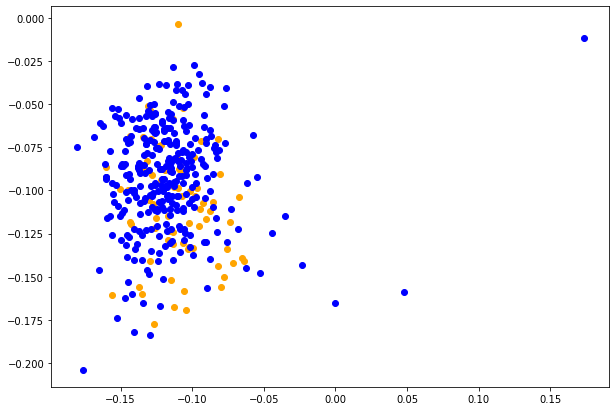

In [1740]:
# import matplotlib.pyplot as plt
# Visualise results
fig, ax = plt.subplots(figsize=(10, 7))
for label, color in zip(set(test_target), ('orange', 'blue')):
    ax.scatter(
        testfeatures_concate[test_target== label, 0],
        testfeatures_concate[test_target== label, 1],
        color=color, label=f'Class {label}'
    )

# Apply PCA

In [1741]:
# from sklearn.decomposition import KernelPCA, PCA
# #pca = KernelPCA(n_components=1200, kernel='rbf')
# pca= PCA(.95)

In [1742]:
# #Apply PCA to both the training set and the test set.
# trainfeatures_pca = pca.fit_transform(trainfeatures_concate_local)
# testfeatures_pca = pca.transform(testfeatures_concate_local)
# print(trainfeatures_pca.shape)
# print(testfeatures_pca.shape)


# train_features_orignal_pca = pca.fit_transform(train_features_orignal)
# test_features_orignal_pca = pca.transform(test_features_orignal)
# print(train_features_orignal_pca.shape)
# print(test_features_orignal_pca.shape)


In [1743]:
# trainfeatures_concate = np.concatenate((trainfeatures_pca,train_features_orignal_pca), axis=1)
# print(trainfeatures_concate.shape)

# testfeatures_concate = np.concatenate((testfeatures_pca,test_features_orignal_pca), axis=1)
# print(testfeatures_concate.shape)

In [1744]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import seaborn as sns

# def tsne_plot(x, y):
      
#     # Setting the plotting background
#     sns.set(style ="whitegrid")
      
#     tsne = TSNE(n_components = 2, random_state = 0)
      
#     # Reducing the dimensionality of the data
#     X_transformed = tsne.fit_transform(x)
  
#     plt.figure(figsize =(10, 7))
      
#     # Building the scatter plot
#     plt.scatter(X_transformed[np.where(y == 0), 0], 
#                 X_transformed[np.where(y == 0), 1],
#                 marker ='o', color ='y', linewidth ='1',
#                 alpha = 0.8, label ='Melanoma')
#     plt.scatter(X_transformed[np.where(y == 1), 0],
#                 X_transformed[np.where(y == 1), 1],
#                 marker ='o', color ='k', linewidth ='1',
#                 alpha = 0.8, label ='Non-Melanoma')
  
#     # Specifying the location of the legend
#     plt.legend(loc ='best')
      
#     # Plotting the reduced data
#     plt.show()

# tsne_plot(float(testfeatures_concate), float(test_target))

# Standardize the Data

In [1745]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaler = RobustScaler()

# Apply transform to both the training set and the test set on patch images concatination.
trainfeatures_scale = scaler.fit_transform(trainfeatures_concate)
testfeatures_scale = scaler.transform(testfeatures_concate)

# Apply transform to both the training set and the test set on orignal image features.
# trainfeatures_std_orignal = scaler.fit_transform(train_features_orignal)
# testfeatures_std_orignal = scaler.transform(test_features_orignal)

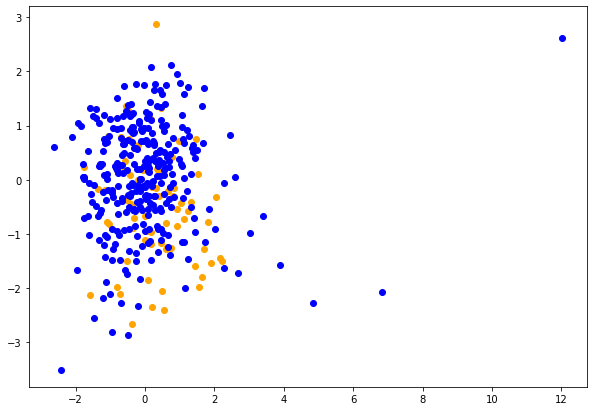

In [1746]:
# Visualise results
fig, ax = plt.subplots(figsize=(10, 7))
for label, color in zip(set(test_target), ('orange', 'blue')):
    ax.scatter(
        testfeatures_scale[test_target== label, 0],
        testfeatures_scale[test_target== label, 1],
        color=color, label=f'Class {label}'
    )

In [1747]:
# trainfeatures = trainfeatures_concate
# testfeatures = testfeatures_concate

# trainfeatures = trainfeatures_scale
# testfeatures = testfeatures_scale

In [1748]:

# power-normalization
trainfeatures = np.sign(trainfeatures_scale) * np.abs(trainfeatures_scale) ** 0.5
testfeatures = np.sign(testfeatures_scale) * np.abs(testfeatures_scale) ** 0.5

# #L2 normalize
# trainfeatures = trainfeatures_scale / np.sqrt(np.sum(trainfeatures_scale ** 2))
# testfeatures = testfeatures_scale / np.sqrt(np.sum(testfeatures_scale ** 2))

# # All Image Mean Normalization 
# x_train_mean = np.mean(trainfeatures_scale)
# x_train_std = np.std(trainfeatures_scale)

# x_test_mean = np.mean(testfeatures_scale)
# x_test_std = np.std(testfeatures_scale)

# trainfeatures = (trainfeatures_scale - x_train_mean)/x_train_std
# testfeatures = (testfeatures_scale - x_test_mean)/x_test_std

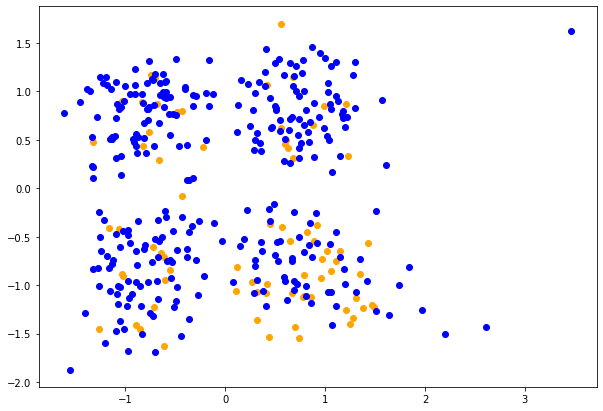

In [1749]:
#Visualise results
fig, ax = plt.subplots(figsize=(10, 7))
for label, color in zip(set(test_target), ('orange', 'blue')):
    ax.scatter(
        testfeatures[test_target== label, 0],
        testfeatures[test_target== label, 1],
        color=color, label=f'Class {label}'
    )


In [1750]:
# #L2 normalize
# trainfeatures /=  np.sqrt(np.sum(trainfeatures ** 2))
# testfeatures /=   np.sqrt(np.sum(testfeatures ** 2))

In [1751]:
# #Visualise results
# fig, ax = plt.subplots(figsize=(10, 7))
# for label, color in zip(set(test_target), ('orange', 'blue')):
#     ax.scatter(
#         testfeatures[test_target== label, 0],
#         testfeatures[test_target== label, 1],
#         color=color, label=f'Class {label}'
#     )


In [1752]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta,RMSprop,SGD,Adam
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from numpy.random import seed
seed(1337)

In [1753]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(trainfeatures,
                                                             trainfeatures,
                                                             test_size=0.1,
                                                             random_state=42)

# Building the Auto-encoder neural network

In [1754]:
seed(1337)
leaky_relu = LeakyReLU(alpha=0.2)
regularizer = regularizers.l1(10e-5)
#Dense(10, activation=leaky_relu)
# Building the Input Layer
#learning_rate = 0.001
input_layer = Input(shape =(trainfeatures.shape[1], ))
  
# encoded = Dense(6400, activation =leaky_relu)(input_layer)
# encoded = BatchNormalization()(encoded)
# encoded = Dense(3200, activation =leaky_relu)(encoded)
# encoded = BatchNormalization()(encoded)
# encoded = Dense(1600, activation =leaky_relu)(encoded)
# encoded = BatchNormalization()(encoded)
# encoded = Dense(800, activation =leaky_relu)(encoded)
# encoded = BatchNormalization()(encoded)
# encoded = Dense(400, activation =leaky_relu)(encoded)
# encoded = BatchNormalization()(encoded)

# encoded = Dense(200, activation =leaky_relu)(encoded)
# encoded = BatchNormalization()(encoded)
  
# # Building the Decoder network
# decoded = Dense(400, activation =leaky_relu)(encoded)
# decoded = BatchNormalization()(decoded)
# decoded = Dense(800, activation =leaky_relu)(decoded)
# decoded = BatchNormalization()(decoded)
# decoded = Dense(1600, activation =leaky_relu)(decoded)
# decoded = BatchNormalization()(decoded)
# decoded = Dense(3200, activation =leaky_relu)(decoded)
# decoded = BatchNormalization()(decoded)
# decoded = Dense(6400, activation =leaky_relu)(decoded)
# decoded = BatchNormalization()(decoded)
  

# encoded = Dense(1024, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(input_layer)
# encoded = BatchNormalization()(encoded)
# #encoded = Dropout(0.2)(encoded)

# encoded = Dense(512, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(encoded)
# encoded = BatchNormalization()(encoded)
# #encoded = Dropout(0.2)(encoded)

# encoded = Dense(256, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(encoded)
# encoded = BatchNormalization()(encoded)
# #encoded = Dropout(0.2)(encoded)

# encoded = Dense(128, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(encoded)
# encoded = BatchNormalization()(encoded)
# #encoded = Dropout(0.2)(encoded)

# encoded = Dense(64, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(encoded)
# encoded = BatchNormalization()(encoded)
# #encoded = Dropout(0.2)(encoded)

# encoded = Dense(32, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(encoded)
# encoded = BatchNormalization()(encoded)
# #encoded = Dropout(0.2)(encoded)

# # Building the Decoder network
# decoded = Dense(64, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(encoded)
# decoded = BatchNormalization()(decoded)
# #decoded = Dropout(0.2)(decoded)

# decoded = Dense(128, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(decoded)
# decoded = BatchNormalization()(decoded)
# #decoded = Dropout(0.2)(decoded)

# decoded = Dense(256, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(decoded)
# decoded = BatchNormalization()(decoded)
# #decoded = Dropout(0.2)(decoded)

# decoded = Dense(512, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(decoded)
# decoded = BatchNormalization()(decoded)
# #decoded = Dropout(0.2)(decoded)

# decoded = Dense(1024, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(decoded)
# decoded = BatchNormalization()(decoded)
# #decoded = Dropout(0.2)(decoded)

# # Building the Output Layer
# output_layer = Dense(trainfeatures.shape[1], activation ='relu')(decoded)

# autoencoder = Model(inputs=input_layer, outputs=output_layer)
# autoencoder.summary()


encoded = Dense(1024, activation ='relu', activity_regularizer = regularizer)(input_layer)
encoded = BatchNormalization()(encoded)
#encoded = Dropout(0.2)(encoded)

encoded = Dense(512, activation ='relu', activity_regularizer = regularizer)(encoded)
encoded = BatchNormalization()(encoded)
#encoded = Dropout(0.2)(encoded)

encoded = Dense(256, activation ='relu', activity_regularizer = regularizer)(encoded)
encoded = BatchNormalization()(encoded)
#encoded = Dropout(0.2)(encoded)

encoded = Dense(128, activation ='relu', activity_regularizer = regularizer)(encoded)
encoded = BatchNormalization()(encoded)
#encoded = Dropout(0.2)(encoded)

# Building the Decoder network
decoded = Dense(256, activation ='relu')(encoded)
decoded = BatchNormalization()(decoded)
#decoded = Dropout(0.2)(decoded)

decoded = Dense(512, activation ='relu')(decoded)
decoded = BatchNormalization()(decoded)
#decoded = Dropout(0.2)(decoded)

decoded = Dense(1024, activation ='relu')(decoded)
decoded = BatchNormalization()(decoded)
#decoded = Dropout(0.2)(decoded)

# Building the Output Layer
output_layer = Dense(trainfeatures.shape[1], activation ='relu')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.summary()

Model: "model_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_87 (InputLayer)        [(None, 2560)]            0         
_________________________________________________________________
dense_737 (Dense)            (None, 1024)              2622464   
_________________________________________________________________
batch_normalization_653 (Bat (None, 1024)              4096      
_________________________________________________________________
dense_738 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_654 (Bat (None, 512)               2048      
_________________________________________________________________
dense_739 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_655 (Bat (None, 256)               102

# Defining and Training the Auto-encoder

In [1755]:
batch_size = 32
#epochs = 100
num_classes = 2
#filepath = "autoencoder.h5"

autoencoder.compile(loss='mean_squared_error', optimizer = 'adam')
#autoencoder.compile(loss='categorical_crossentropy', optimizer = 'sgd')
#autoencoder.compile(loss='mean_squared_error', optimizer = 'RMSprop')

#checkpoint = ModelCheckpoint(filepath = "autoencoder.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3,verbose=1, mode='min', min_lr=0.00001)

early_stop = EarlyStopping(monitor = 'val_loss',mode = 'min',min_delta = 0, patience = 5, restore_best_weights = True)

callbacks_list = [reduce_lr, early_stop]

autoencoder_train = autoencoder.fit(train_X, train_ground, 
                                    batch_size=batch_size,
                                    epochs=100,
                                    verbose=1,                                   
                                    callbacks=callbacks_list,
                                    validation_data=(valid_X, valid_ground))

Epoch 1/100
26/26 [==============================] - 2s 18ms/step - loss: 0.9284 - val_loss: 0.9531
Epoch 2/100
26/26 [==============================] - 0s 8ms/step - loss: 0.7695 - val_loss: 0.7682
Epoch 3/100
26/26 [==============================] - 0s 9ms/step - loss: 0.7258 - val_loss: 0.8026
Epoch 4/100
26/26 [==============================] - 0s 9ms/step - loss: 0.7112 - val_loss: 0.7302
Epoch 5/100
26/26 [==============================] - 0s 9ms/step - loss: 0.7025 - val_loss: 0.7287
Epoch 6/100
26/26 [==============================] - 0s 11ms/step - loss: 0.6937 - val_loss: 0.7244
Epoch 7/100
26/26 [==============================] - 0s 14ms/step - loss: 0.6888 - val_loss: 0.7001
Epoch 8/100
26/26 [==============================] - 0s 14ms/step - loss: 0.6766 - val_loss: 0.6909
Epoch 9/100
26/26 [==============================] - 0s 12ms/step - loss: 0.6711 - val_loss: 0.6775
Epoch 10/100
26/26 [==============================] - 0s 8ms/step - loss: 0.6711 - val_loss: 0.6802
Epoc

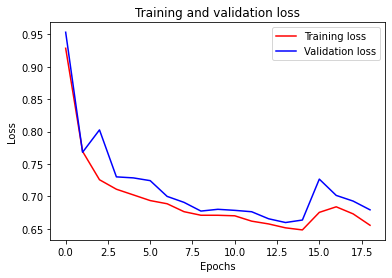

In [1756]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("unsu_loss.eps",dpi=300)
plt.show()


In [1757]:
#autoencoder.save_weights('autoencoder.h5')

In [1758]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_target)
test_Y_one_hot = to_categorical(test_target)

# Display the change for category label using one-hot encoding
print('Original label:', train_target[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1.]


In [1759]:
train_X,valid_X,train_label,valid_label = train_test_split(trainfeatures,
                                                           train_Y_one_hot,
                                                           test_size=0.1,
                                                           random_state=42)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((810, 2560), (90, 2560), (810, 2), (90, 2))

# Classification model

In [1760]:
seed(1337)
num_classes = 2
# Building the Input Layer
input_layer = Input(shape =(trainfeatures.shape[1], ))
  
# # Building the Encoder network
# encoded = Dense(6400, activation =leaky_relu)(input_layer)
# encoded = BatchNormalization()(encoded)
# encoded = Dense(3200, activation =leaky_relu)(encoded)
# encoded = BatchNormalization()(encoded)
# encoded = Dense(1600, activation =leaky_relu)(encoded)
# encoded = BatchNormalization()(encoded)
# encoded = Dense(800, activation =leaky_relu)(encoded)
# encoded = BatchNormalization()(encoded)
# encoded = Dense(400, activation =leaky_relu)(encoded)
# encoded = BatchNormalization()(encoded)

# encoded = Dense(200, activation =leaky_relu)(encoded)
# encoded = BatchNormalization()(encoded)

# decoded = Dense(100, activation =leaky_relu)(encoded)
# decoded = BatchNormalization()(decoded)
# decoded = Dense(50, activation=leaky_relu)(decoded)
# decoded = BatchNormalization()(decoded)
# decoded = Dense(32, activation=leaky_relu)(decoded)
# decoded = BatchNormalization()(decoded)
# decoded = Dense(16, activation=leaky_relu)(decoded)
# decoded = BatchNormalization()(decoded)
# decoded = Dense(8, activation=leaky_relu)(decoded)
# decoded = BatchNormalization()(decoded)
# decoded = Dense(4, activation=leaky_relu)(decoded)
# decoded = BatchNormalization()(decoded)

# # Building the Encoder network
# encoded = Dense(1024, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(input_layer)
# encoded = BatchNormalization()(encoded)
# #encoded = Dropout(0.2)(encoded)

# encoded = Dense(512, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(encoded)
# encoded = BatchNormalization()(encoded)
# #encoded = Dropout(0.2)(encoded)

# encoded = Dense(256, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(encoded)
# encoded = BatchNormalization()(encoded)
# #encoded = Dropout(0.2)(encoded)

# encoded = Dense(128, activation =leaky_relu, activity_regularizer = regularizers.l1(10e-5))(encoded)
# encoded = BatchNormalization()(encoded)
# #encoded = Dropout(0.2)(encoded)

# decoded = Dense(64, activation=leaky_relu,  activity_regularizer = regularizers.l1(10e-5))(encoded)
# decoded = BatchNormalization()(decoded)
# #decoded = Dropout(0.2)(decoded)

# decoded = Dense(32, activation=leaky_relu,activity_regularizer = regularizers.l1(10e-5))(decoded)
# decoded = BatchNormalization()(decoded)
# #decoded = Dropout(0.2)(decoded)

# decoded = Dense(16, activation=leaky_relu,activity_regularizer = regularizers.l1(10e-5))(decoded)
# decoded = BatchNormalization()(decoded)
# #decoded = Dropout(0.2)(decoded)

# decoded = Dense(8, activation=leaky_relu, activity_regularizer = regularizers.l1(10e-5))(decoded)
# decoded = BatchNormalization()(decoded)
# #decoded = Dropout(0.2)(decoded)

# #decoded = Dense(15, activation='relu')(decoded)
# #decoded = BatchNormalization()(decoded)

# out = Dense(num_classes, activation='softmax')(decoded)

# autoencoder_classification = Model(inputs=input_layer, outputs=out)
# autoencoder_classification.summary()

# Building the Encoder network
encoded = Dense(1024, activation ='relu', activity_regularizer = regularizer)(input_layer)
encoded = BatchNormalization()(encoded)
#encoded = Dropout(0.2)(encoded)

encoded = Dense(512, activation ='relu', activity_regularizer = regularizer)(encoded)
encoded = BatchNormalization()(encoded)
#encoded = Dropout(0.2)(encoded)

encoded = Dense(256, activation ='relu', activity_regularizer = regularizer)(encoded)
encoded = BatchNormalization()(encoded)
#encoded = Dropout(0.2)(encoded)

encoded = Dense(128, activation ='relu', activity_regularizer = regularizer)(encoded)
encoded = BatchNormalization()(encoded)
#encoded = Dropout(0.2)(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
#decoded = Dropout(0.2)(decoded)

decoded = Dense(32, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
#decoded = Dropout(0.2)(decoded)

decoded = Dense(16, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
#decoded = Dropout(0.2)(decoded)

decoded = Dense(8, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
#decoded = Dropout(0.2)(decoded)

#decoded = Dense(15, activation='relu')(decoded)
#decoded = BatchNormalization()(decoded)

out = Dense(num_classes, activation='softmax')(decoded)

autoencoder_classification = Model(inputs=input_layer, outputs=out)
autoencoder_classification.summary()



Model: "model_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_88 (InputLayer)        [(None, 2560)]            0         
_________________________________________________________________
dense_745 (Dense)            (None, 1024)              2622464   
_________________________________________________________________
batch_normalization_660 (Bat (None, 1024)              4096      
_________________________________________________________________
dense_746 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_661 (Bat (None, 512)               2048      
_________________________________________________________________
dense_747 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_662 (Bat (None, 256)               102

In [1761]:
# orig_model = load_model(filepath) # create the base pre-trained model
# base_model = Model(inputs=orig_model.input, outputs=orig_model.get_layer('latent_feats').output)
    
for l1,l2 in zip(autoencoder_classification.layers[:8],autoencoder.layers[0:8]):
    l1.set_weights(l2.get_weights())
    
# weights_list = autoencoder.get_weights()    
# for i, weights in enumerate(weights_list[0:9]):
#     autoencoder_classification.layers[i].set_weights(weights)

# Train first time with derived weights (Train only Fully connected part)

In [1762]:
for layer in autoencoder_classification.layers[0:8]:
    layer.trainable = False

In [1763]:
# autoencoder_classification.compile(loss=keras.losses.categorical_crossentropy, 
#                                    optimizer=keras.optimizers.Adam(),
#                                    metrics=['accuracy'])
# autoencoder_classification.compile(loss='mean_squared_error', optimizer = 'adam')
# autoencoder_classification.fit(trainfeatures, train_target,
#                                 epochs=epochs,
#                                 batch_size=batch_size,
#                                 verbose=1)
# categorical_crossentropy, binary_crossentropy

autoencoder_classification.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [1764]:

checkpoint = ModelCheckpoint(filepath = "autoencoder_classification_first.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, mode='max', min_lr=0.00001)

early_stop = EarlyStopping(monitor = 'val_accuracy',mode = 'max',min_delta = 0, patience = 5, restore_best_weights = True)

callbacks_list = [reduce_lr,checkpoint]

classify_train = autoencoder_classification.fit(train_X, 
                                                train_label, 
                                                batch_size=batch_size,
                                                epochs=100,
                                                verbose=1,
                                                callbacks=callbacks_list,
                                                validation_data=(valid_X, valid_label))

Epoch 1/100
26/26 [==============================] - 2s 18ms/step - loss: 0.9220 - accuracy: 0.5148 - val_loss: 0.7412 - val_accuracy: 0.6444

Epoch 00001: val_accuracy improved from -inf to 0.64444, saving model to autoencoder_classification_first.h5
Epoch 2/100
26/26 [==============================] - 0s 8ms/step - loss: 0.7784 - accuracy: 0.6173 - val_loss: 0.7038 - val_accuracy: 0.7778

Epoch 00002: val_accuracy improved from 0.64444 to 0.77778, saving model to autoencoder_classification_first.h5
Epoch 3/100
26/26 [==============================] - 0s 8ms/step - loss: 0.7061 - accuracy: 0.6988 - val_loss: 0.6812 - val_accuracy: 0.8111

Epoch 00003: val_accuracy improved from 0.77778 to 0.81111, saving model to autoencoder_classification_first.h5
Epoch 4/100
26/26 [==============================] - 0s 8ms/step - loss: 0.6470 - accuracy: 0.7519 - val_loss: 0.6604 - val_accuracy: 0.7667

Epoch 00004: val_accuracy did not improve from 0.81111
Epoch 5/100
26/26 [========================

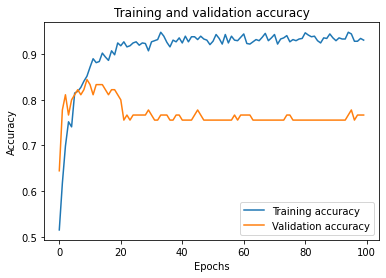

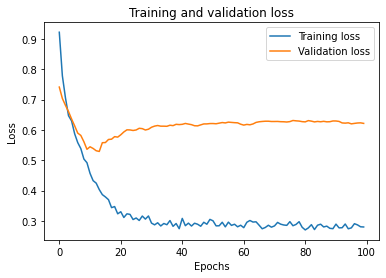

In [1765]:
# autoencoder_classification.save_weights('autoencoder_classification.h5')
accuracy = classify_train.history['accuracy']
val_accuracy = classify_train.history['val_accuracy']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,  label='Training accuracy')
plt.plot(epochs, val_accuracy,  label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig("train_first_acc.eps",dpi=300)
plt.legend()
plt.figure()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig("train_first_loss.eps",dpi=300)
plt.legend()
plt.show()

In [1766]:
import itertools

# Function to plot confusion matrix for validation image   
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [1767]:
autoencoder_classification.load_weights('autoencoder_classification_first.h5')

test_eval = autoencoder_classification.evaluate(testfeatures, test_Y_one_hot, verbose=0)

In [1768]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5872718095779419
Test accuracy: 0.7651715278625488


In [1769]:
predicted_classes = autoencoder_classification.predict(testfeatures)

In [1770]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

CLASSIFICATION REPORT FOR AutoEncoder
Confusion MAtrix:

              precision    recall  f1-score   support

           0     0.3409    0.2000    0.2521        75
           1     0.8209    0.9046    0.8607       304

    accuracy                         0.7652       379
   macro avg     0.5809    0.5523    0.5564       379
weighted avg     0.7259    0.7652    0.7403       379



,0,1,micro-average
accuracy,0.765172,0.765172,0.765172
precision,0.340909,0.820896,0.765172
recall,0.200000,0.904605,0.765172
specificity,0.904605,0.200000,0.765172
f1,0.252101,0.860720,0.765172


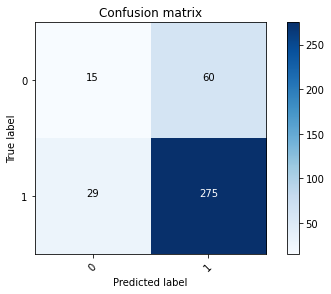

In [1771]:
from sklearn.metrics import confusion_matrix,classification_report

print("CLASSIFICATION REPORT FOR AutoEncoder")
print("Confusion MAtrix:")
cm = confusion_matrix(test_target,predicted_classes)
plot_confusion_matrix(cm, classes = range(2)) 
print()
print(classification_report(test_target,predicted_classes, digits=4))
# print("train score:",trainscore)
# print("test_score:",testscore)

#Classification Metrix Print
import disarray
import pandas as pd

df = pd.DataFrame(cm)
df.da.export_metrics(metrics_to_include=['accuracy', 'precision', 'recall', 'specificity', 'f1'])

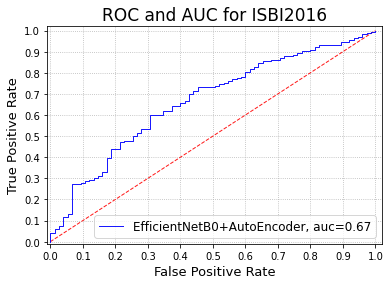

In [1772]:
# from sklearn.metrics import roc_auc_score, auc
# from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(test_target, predicted_classes)
# auc = auc(fpr, tpr)
    
# plt.plot(fpr, tpr, c='r', lw=2, alpha=0.7, label=u'AUC=%.3f' % auc)
# plt.plot((0, 1), (0, 1), c='#808080', lw=1, ls='--', alpha=0.7)
# plt.xlim((-0.01, 1.02))
# plt.ylim((-0.01, 1.02))
# plt.xticks(np.arange(0, 1.1, 0.1))
# plt.yticks(np.arange(0, 1.1, 0.1))
# plt.xlabel('False Positive Rate', fontsize=13)
# plt.ylabel('True Positive Rate', fontsize=13)
# plt.grid(b=True, ls=':')
# plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
# #plt.title(u'ROC and AUC for ISBI2016', fontsize=17)

# import scikitplot as skplt
# import matplotlib.pyplot as plt
from sklearn import metrics

# # test_target = # ground truth labels
# # test_predictions = # predicted probabilities generated by sklearn classifier
# skplt.metrics.plot_roc_curve(test_target, test_predictions)
# plt.show()

y_pred_proba = autoencoder_classification.predict_on_batch(testfeatures)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_target,  y_pred_proba)
auc = metrics.roc_auc_score(test_target, y_pred_proba)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.plot((0, 1), (0, 1), c='r', lw=1, ls='--', alpha=0.9)
plt.plot(fpr,tpr, c='b', lw=1, alpha=0.9, label='EfficientNetB0+AutoEncoder, auc='+str(round(auc,2)))
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'ROC and AUC for ISBI2016', fontsize=17)
plt.savefig("ROC_first_ISBI2016.eps",dpi=300)
plt.show()

# Re-train the model by making the first six layers trainable as True

In [1773]:
for layer in autoencoder_classification.layers[0:8]:
    layer.trainable = True

In [1774]:
autoencoder_classification.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [1775]:
checkpoint = ModelCheckpoint(filepath = "autoencoder_classification.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, mode='max', min_lr=0.00001)

early_stop = EarlyStopping(monitor = 'val_accuracy',mode = 'max',min_delta = 0, patience = 5, restore_best_weights = True)

callbacks_list = [checkpoint, reduce_lr]

classify_train = autoencoder_classification.fit(train_X, train_label, 
                                                batch_size=batch_size,
                                                epochs=100,
                                                verbose=1,
                                                callbacks=callbacks_list,
                                                validation_data=(valid_X, valid_label))

Epoch 1/100
26/26 [==============================] - 2s 20ms/step - loss: 0.5824 - accuracy: 0.7815 - val_loss: 0.6838 - val_accuracy: 0.7333

Epoch 00001: val_accuracy improved from -inf to 0.73333, saving model to autoencoder_classification.h5
Epoch 2/100
26/26 [==============================] - 0s 10ms/step - loss: 0.5401 - accuracy: 0.8185 - val_loss: 0.6667 - val_accuracy: 0.7778

Epoch 00002: val_accuracy improved from 0.73333 to 0.77778, saving model to autoencoder_classification.h5
Epoch 3/100
26/26 [==============================] - 0s 10ms/step - loss: 0.4641 - accuracy: 0.8901 - val_loss: 0.6049 - val_accuracy: 0.8222

Epoch 00003: val_accuracy improved from 0.77778 to 0.82222, saving model to autoencoder_classification.h5
Epoch 4/100
26/26 [==============================] - 0s 12ms/step - loss: 0.4380 - accuracy: 0.8901 - val_loss: 0.6340 - val_accuracy: 0.7889

Epoch 00004: val_accuracy did not improve from 0.82222
Epoch 5/100
26/26 [==============================] - 0s 10

In [1776]:
#classify_train.save_weights('autoencoder_classification.h5')

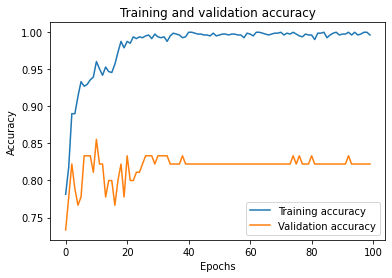

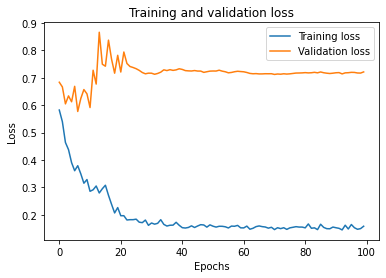

In [1777]:
accuracy = classify_train.history['accuracy']
val_accuracy = classify_train.history['val_accuracy']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,  label='Training accuracy')
plt.plot(epochs, val_accuracy,  label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig("train_second_acc.eps",dpi=300)
plt.legend()
plt.figure()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig("train_second_loss.eps",dpi=300)
plt.legend()
plt.show()

# Model Evaluation on the Test Set

In [1778]:
autoencoder_classification.load_weights('autoencoder_classification.h5')

test_eval = autoencoder_classification.evaluate(testfeatures, test_Y_one_hot, verbose=0)

In [1779]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6563927531242371
Test accuracy: 0.8205804824829102


In [1780]:
predicted_classes_final = autoencoder_classification.predict(testfeatures)


In [1781]:
predicted_classes_final = np.argmax(np.round(predicted_classes_final),axis=1)

CLASSIFICATION REPORT FOR AutoEncoder
Confusion MAtrix:

              precision    recall  f1-score   support

           0     0.5778    0.3467    0.4333        75
           1     0.8533    0.9375    0.8934       304

    accuracy                         0.8206       379
   macro avg     0.7155    0.6421    0.6634       379
weighted avg     0.7988    0.8206    0.8024       379



,0,1,micro-average
accuracy,0.820580,0.820580,0.82058
precision,0.577778,0.853293,0.82058
recall,0.346667,0.937500,0.82058
specificity,0.937500,0.346667,0.82058
f1,0.433333,0.893417,0.82058


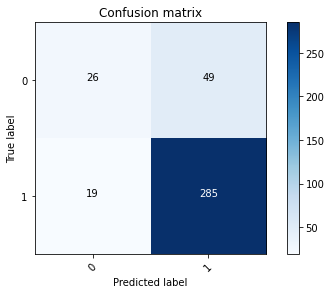

In [1782]:
from sklearn.metrics import confusion_matrix,classification_report

print("CLASSIFICATION REPORT FOR AutoEncoder")
print("Confusion MAtrix:")
cm = confusion_matrix(test_target,predicted_classes_final)
plot_confusion_matrix(cm, classes = range(2)) 
print()
print(classification_report(test_target,predicted_classes_final, digits=4))
# print("train score:",trainscore)
# print("test_score:",testscore)

#Classification Metrix Print
import disarray
import pandas as pd

df = pd.DataFrame(cm)
df.da.export_metrics(metrics_to_include=['accuracy', 'precision', 'recall', 'specificity', 'f1'])

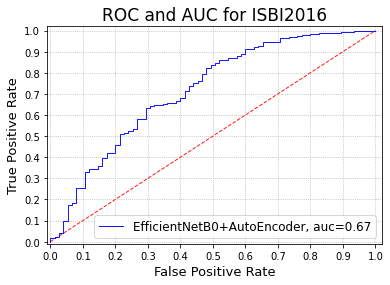

In [1783]:
# from sklearn.metrics import roc_auc_score, auc
# from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(test_target, predicted_classes_final)
# auc = auc(fpr, tpr)
    
# plt.plot(fpr, tpr, c='r', lw=2, alpha=0.7, label=u'AUC=%.3f' % auc)
# plt.plot((0, 1), (0, 1), c='#808080', lw=1, ls='--', alpha=0.7)
# plt.xlim((-0.01, 1.02))
# plt.ylim((-0.01, 1.02))
# plt.xticks(np.arange(0, 1.1, 0.1))
# plt.yticks(np.arange(0, 1.1, 0.1))
# plt.xlabel('False Positive Rate', fontsize=13)
# plt.ylabel('True Positive Rate', fontsize=13)
# plt.grid(b=True, ls=':')
# plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
# #plt.title(u'ROC and AUC for ISBI2016', fontsize=17)

from sklearn import metrics

# # test_target = # ground truth labels
# # test_predictions = # predicted probabilities generated by sklearn classifier
# skplt.metrics.plot_roc_curve(test_target, test_predictions)
# plt.show()

predicted_classes_final = autoencoder_classification.predict_on_batch(testfeatures)[::,1]
np.savetxt('EffiicientB0_AE.csv',predicted_classes_final, delimiter=',')
fpr, tpr, _ = metrics.roc_curve(test_target,  predicted_classes_final)
auc2 = metrics.roc_auc_score(test_target, y_pred_proba)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.plot((0, 1), (0, 1), c='r', lw=1, ls='--', alpha=0.9)
plt.plot(fpr,tpr, c='b', lw=1, alpha=0.9, label='EfficientNetB0+AutoEncoder, auc='+str(round(auc2,2)))
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'ROC and AUC for ISBI2016', fontsize=17)
plt.savefig("ROC_second_ISBI2016.eps",dpi=300)
plt.show()